# Data Task

### Problem

As part of the sustainability efforts, we track the amount of greenhouse gas emissions (GHG) produced by apparel factories. This can be influenced by the amount of production that occurs so we have collected data on both GHG and key production metrics

If our target is to reduce total GHG by 10% by 2026, what recommendations do you have for how this can be achieved?


### Data

The data consists of the following columns:
* **Factory**: ID to identify which of six factories the data relates to
* **Month**: data is recorded monthly
* **GHG**: greenhouse gas emissions 
  * These could be from electricity (including to power sewing machines), vehicles, boiler, etc.
* **SAH**: standard allowed hours 
  * The time a skilled worker should take to complete the produced garments under standard conditions, and is a key measure of business activity
  * More pieces produced = more time required for production = higher SAH
* **EFF**: efficiency 
  * The ratio of expected time for production to the actual time taken
  * For example a garment with 8 SAH that takes 10 hours to produce will count as 80% efficiency
* **WH**: total working hours 
  * Includes employees both directly and indirectly involved in production
* **W**: number of workers


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [2]:
data = pd.read_csv('metail_task_data.csv')
data

Factory       Month      GHG       SAH   EFF         WH       W
0        150  2024-07-01  11843.4  290371.0  0.68   850022.0  3907.0
1        434  2024-07-01  14111.3  315237.0  0.57  1062463.0  4857.0
2        761  2024-07-01  19339.7  170626.0  0.76   506523.0  2314.0
3       1122  2024-07-01   8470.5  132686.0  0.53   572829.0  2582.0
4       1396  2024-07-01   8236.1  159381.0  0.31  1078478.0  4929.0
..       ...         ...      ...       ...   ...        ...     ...
391      150  2018-08-01   8602.4  316498.0  0.74   845392.0  3864.0
392      434  2018-08-01  17952.9  268464.0  0.43  1220684.0  5622.0
393      761  2018-08-01  15155.2  152220.0  0.66   432533.0  2052.0
394     1122  2018-08-01  11514.2  159465.0  0.41   767221.0  3524.0
395     1396  2018-08-01   6737.2  151906.0  0.32  1009826.0  4567.0

[396 rows x 7 columns]

In [3]:
data.dtypes

Factory      int64
Month       object
GHG        float64
SAH        float64
EFF        float64
WH         float64
W          float64
dtype: object

In [4]:
data['Month'] = pd.to_datetime(data['Month'])

In [5]:
data.isnull().sum()

Factory    0
Month      0
GHG        0
SAH        0
EFF        0
WH         0
W          0
dtype: int64

In [6]:
data.describe()

Factory                          Month           GHG  \
count   396.000000                            396    396.000000   
mean    881.090909  2021-09-04 12:36:21.818181888  10713.431566   
min     150.000000            2018-08-01 00:00:00   1989.200000   
25%     434.000000            2020-03-01 00:00:00   6528.625000   
50%     761.000000            2021-10-16 12:00:00   8962.850000   
75%    1396.000000            2023-03-01 00:00:00  15117.100000   
max    1966.000000            2024-07-01 00:00:00  29096.700000   
std     550.155717                            NaN   5678.449331   

                 SAH         EFF            WH            W  
count     396.000000  396.000000  3.960000e+02   396.000000  
mean   185302.845960    0.533283  7.103455e+05  3226.580808  
min     20748.000000    0.270000  1.152890e+05   507.000000  
25%    141692.000000    0.390000  4.796350e+05  2202.750000  
50%    160831.000000    0.510000  7.086210e+05  3186.500000  
75%    265440.000000    0.670000  9.292070e+05  4216.250000  
max    338432.000000    0.950000  1.743912e+06  7813.000000  
std     81129.717562    0.152431  3.142749e+05  1423.732332

# Exploratory Data Analysis

In [7]:
# Summarize the data by Factory to understand the differences
factory_summary = data.groupby('Factory').agg({
    'GHG': ['mean', 'sum'],  # Calculate mean and sum of GHG emissions
    'SAH': ['mean', 'sum'],  # Calculate mean and sum of SAH
    'EFF': 'mean',           # Calculate mean of Efficiency
    'WH': ['mean', 'sum'],   # Calculate mean and sum of WH
    'W': 'mean'              # Calculate mean of Workers
}).reset_index()

# Flatten the multi-level column index resulting from aggregation
factory_summary.columns = [
    'Factory',                # Factory name
    'GHG_mean',               # Mean GHG emissions
    'GHG_total',              # Total GHG emissions
    'SAH_mean',               # Mean SAH
    'SAH_total',              # Total SAH
    'EFF_mean',               # Mean Efficiency
    'WH_mean',                # Mean WH
    'WH_total',               # Total WH
    'W_mean'                  # Mean Workers
]

# Sort the summary table by total GHG emissions in descending order
factory_summary_sorted = factory_summary.sort_values(by='GHG_total', ascending=False)
factory_summary_sorted

Factory      GHG_mean  GHG_total       SAH_mean   SAH_total  EFF_mean  \
2      761  17553.758333  1263870.6  152007.777778  10944560.0  0.695278   
1      434  16557.852778  1192165.4  278502.430556  20052175.0  0.496250   
0      150   9670.350000   696265.2  278988.694444  20087186.0  0.713472   
3     1122   7395.201389   532454.5  147467.375000  10617651.0  0.496944   
4     1396   6251.515278   450109.1  149878.708333  10791267.0  0.358889   
5     1966   2990.391667   107654.1   24641.333333    887088.0  0.344444   

        WH_mean    WH_total       W_mean  
2  4.408381e+05  31740340.0  2007.152778  
1  1.137897e+06  81928580.0  5164.958333  
0  7.946102e+05  57211935.0  3607.750000  
3  6.019893e+05  43343232.0  2732.819444  
4  8.598803e+05  61911380.0  3907.208333  
5  1.433712e+05   5161362.0   652.611111

**Factory 761:**
* Highest total GHG emissions: 1,263,870.6 units.
* Average GHG emissions: 17,553.8 units.
* Moderate efficiency (EFF_mean): 0.695.
* Relatively low total SAH and WH compared to other high-GHG factories.

**Factory 434:**

* Second highest total GHG emissions: 1,192,165.4 units.
* Lowest efficiency (EFF_mean): 0.496.
* Highest SAH and WH total values, indicating high production but inefficient operations.

**Factory 150:**
* Moderate GHG emissions: 696,265.2 units.
* Highest efficiency (EFF_mean): 0.713.
* High total SAH and WH, indicating efficient high production.

**Factories 1122, 1396, and 1966:**
* Lower GHG emissions, especially Factory 1966 with significantly lower GHG (107,654.1 units).
* Lower efficiency in some cases (e.g., Factory 1966 with an EFF_mean of 0.344).
* Smaller production scale, except Factory 1122 which has moderate SAH and WH totals.


**Key Observations:**

* **Efficiency:** There is a noticeable difference in efficiency across factories. Factories with higher GHG emissions tend to have lower efficiency.
* **Production Volume:** Higher SAH and WH generally correlate with higher GHG emissions, as seen in Factory 434.
* **Potential Levers:** Improving efficiency, particularly in Factory 434 and others with low efficiency, could be a key lever for reducing GHG emissions.

### Outlier Removal

Boxplot use the IQR method to display data and outliers, but in order to get list of identified outlier we will need to use the mathematical formula and retrieve the outlier data. What is IQR? The interquartile range also called midspread or middle 50% is a measure of statistical dispersion being qual to the differences between 75th and 25 percentiles or between upper and lower quartiles.

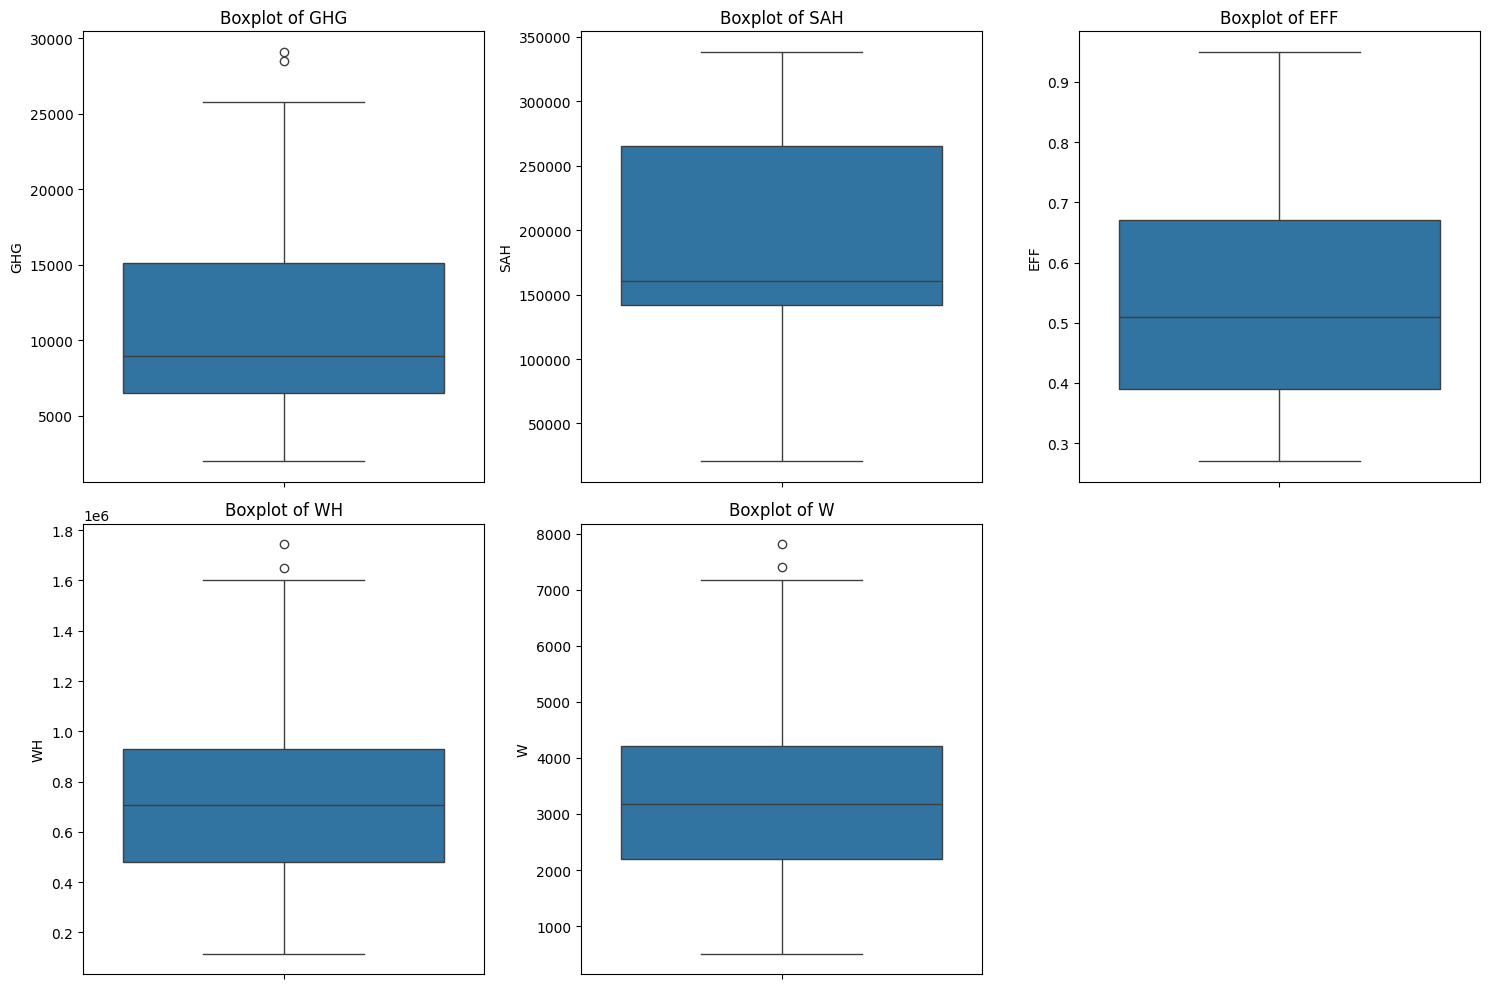

In [8]:
# List of numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['float64']).columns

# Set up the plot area with a figure size
plt.figure(figsize=(15, 10))

# Create boxplots for each numeric feature
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each numeric feature
    sns.boxplot(y=data[column])  # Plot a boxplot for the current column
    plt.title(f'Boxplot of {column}')  # Set the title for the boxplot

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Anypoint outside the whisker is considered as an outlier. Here we can see outliers in GHG, WH and W as two data points are outside the third quartile whisker range.

First we will find out the IQR of the features we suspested the outliers. 

In order to find out if there is any outlier below the first quartile, we substract 1.5 times IQR by the first(25%) quartile. 1.5 times IQR shows the whisker, the spread of data(i.e. -3sigma to +3sigma). Similarly, by adding 1.5 times IQR to third quartile we can find the outliers at the +3sigma level.

In order to remove the outliers from the column, we will use np.where condition which returns the indices where a specified condition is met. It provides a way to perform conditional operations and select elements from an array based on a given condition.

Here the condition is to return all the data points that lies with in the whisker of boxplot and to ignore every other point which lies outside the whisker

In [9]:
# Handling outliers for 'GHG' column
Q1_GHG = data['GHG'].quantile(0.25)  # First quartile (25th percentile) of GHG
Q3_GHG = data['GHG'].quantile(0.75)  # Third quartile (75th percentile) of GHG
IQR_GHG = Q3_GHG - Q1_GHG  # Interquartile range of GHG

# Cap the outliers in 'GHG' column
data['GHG'] = np.where(data['GHG'] > (Q3_GHG + 1.5 * IQR_GHG),
                       Q3_GHG + 1.5 * IQR_GHG,
                       data['GHG'])

# Handling outliers for 'WH' column
Q1_WH = data['WH'].quantile(0.25)  # First quartile (25th percentile) of WH
Q3_WH = data['WH'].quantile(0.75)  # Third quartile (75th percentile) of WH
IQR_WH = Q3_WH - Q1_WH  # Interquartile range of WH

# Cap the outliers in 'WH' column
data['WH'] = np.where(data['WH'] > (Q3_WH + 1.5 * IQR_WH),
                      Q3_WH + 1.5 * IQR_WH,
                      data['WH'])

# Handling outliers for 'W' column
Q1_W = data['W'].quantile(0.25)  # First quartile (25th percentile) of W
Q3_W = data['W'].quantile(0.75)  # Third quartile (75th percentile) of W
IQR_W = Q3_W - Q1_W  # Interquartile range of W

# Cap the outliers in 'W' column
data['W'] = np.where(data['W'] > (Q3_W + 1.5 * IQR_W),
                     Q3_W + 1.5 * IQR_W,
                     data['W'])

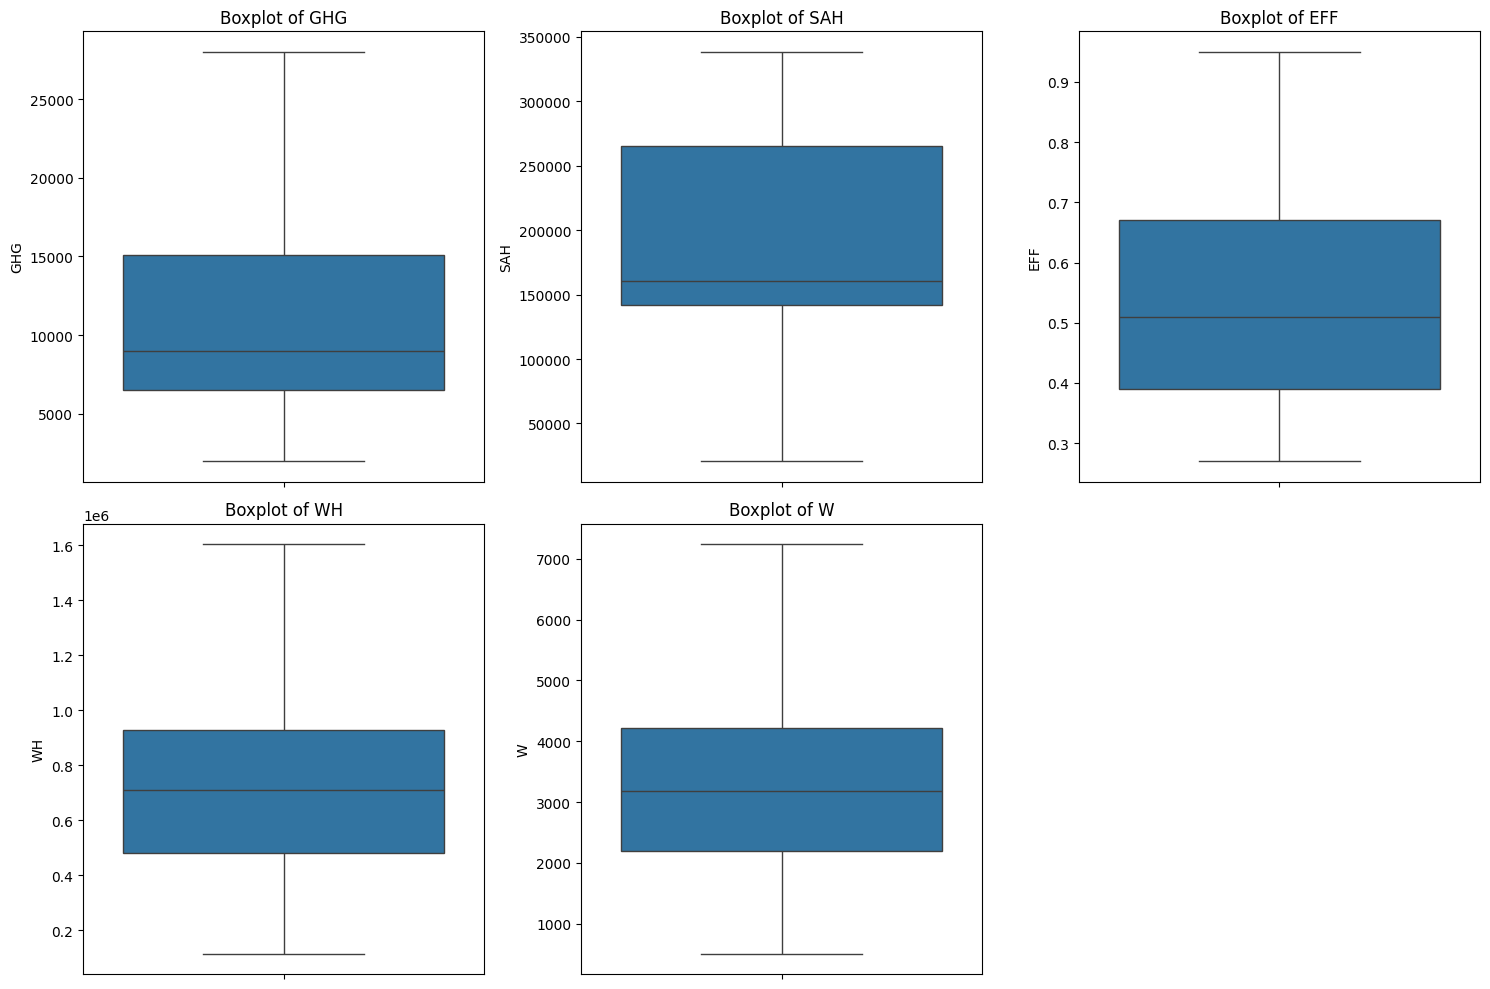

In [10]:
numeric_columns = data.select_dtypes(include=['float64']).columns

# Setting up the plot area
plt.figure(figsize=(15, 10))

# Creating boxplots for each numeric feature
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    
plt.tight_layout()
plt.show()


### Average Worker, Standard Allowed Hours and Efficiency by Factory

C:\Users\WINDOWS10\AppData\Local\Temp\ipykernel_9528\651006369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Factory', y='W', data=factory_w_summary, palette='viridis')


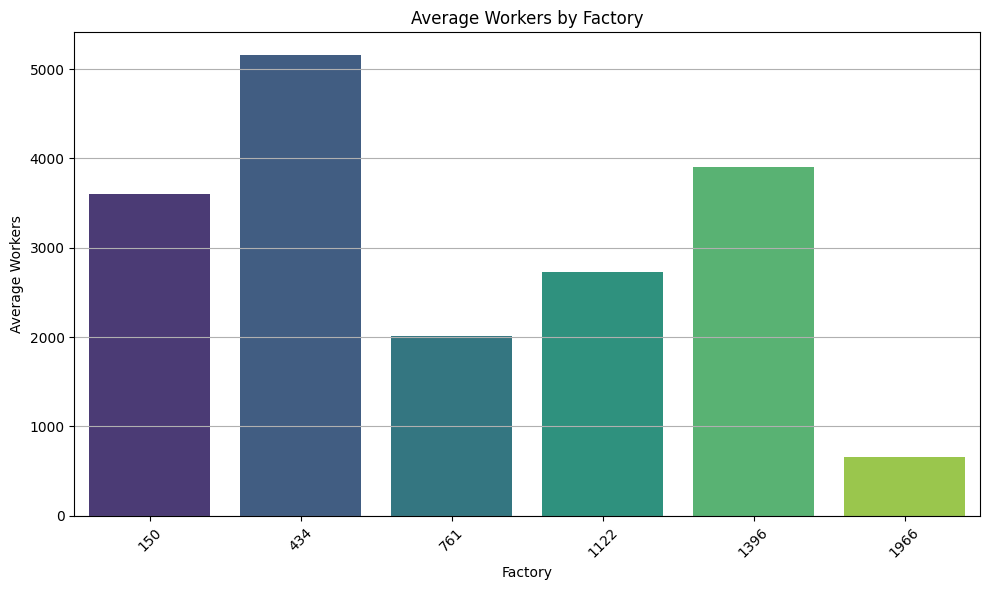

In [11]:
factory_w_summary = data.groupby('Factory')['W'].mean().reset_index()  

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Factory', y='W', data=factory_w_summary, palette='viridis')
plt.xlabel('Factory')
plt.ylabel('Average Workers')  
plt.title('Average Workers by Factory')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

* **Factory 434** has the highest no.of workers whereas **Factory 761** has the second lowest no.of workers

C:\Users\WINDOWS10\AppData\Local\Temp\ipykernel_9528\2400464872.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Factory', y='SAH', data=factory_w_summary, palette='viridis')


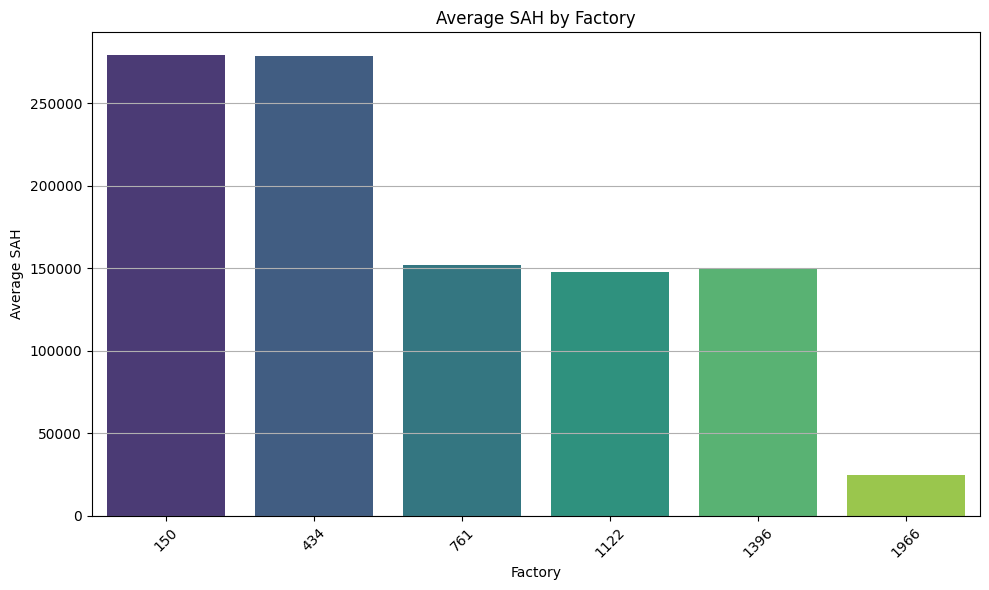

In [12]:
factory_w_summary = data.groupby('Factory')['SAH'].mean().reset_index()  

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Factory', y='SAH', data=factory_w_summary, palette='viridis')
plt.xlabel('Factory')
plt.ylabel('Average SAH')  
plt.title('Average SAH by Factory')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

* **Factory 150** and **434** have the highest standard allowed hours as complared to other factories. 

C:\Users\WINDOWS10\AppData\Local\Temp\ipykernel_9528\909500110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Factory', y='EFF', data=factory_w_summary, palette='viridis')


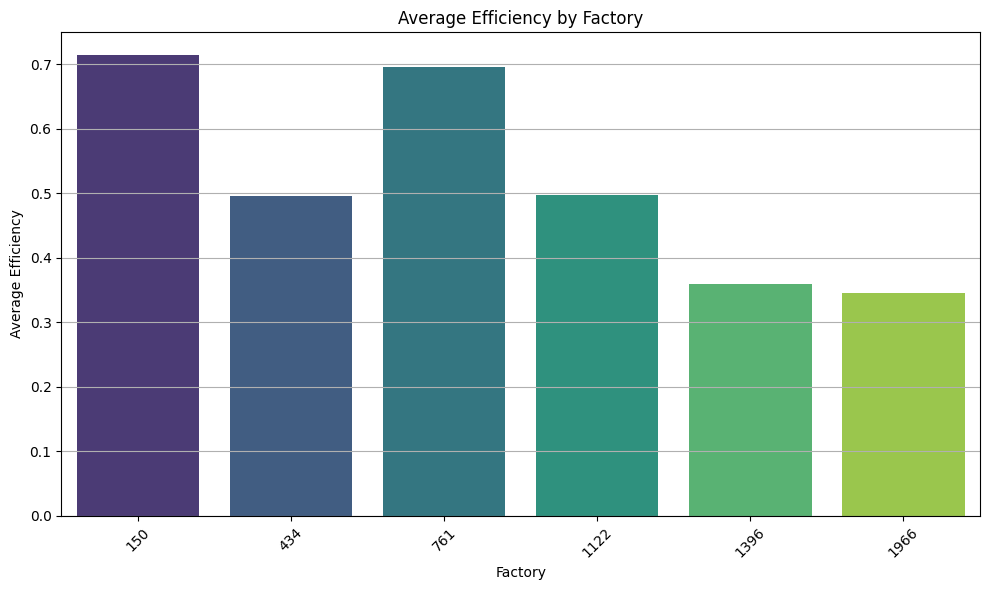

In [13]:
factory_w_summary = data.groupby('Factory')['EFF'].mean().reset_index() 

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Factory', y='EFF', data=factory_w_summary, palette='viridis')
plt.xlabel('Factory')
plt.ylabel('Average Efficiency')  # Change to 'Total W' if using sum
plt.title('Average Efficiency by Factory')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

* **Factory 150** has the highest efficiency
* **Factory 761** has the second highest efficiency although having the second lowest no.of workers and moderate standard allowed hours.
* **Factory 434** having the highest no.of workers and standard allowed hours have the moderate efficiency. 

## Trend Analysis

### GHG Emission Over Time by Factory Trend

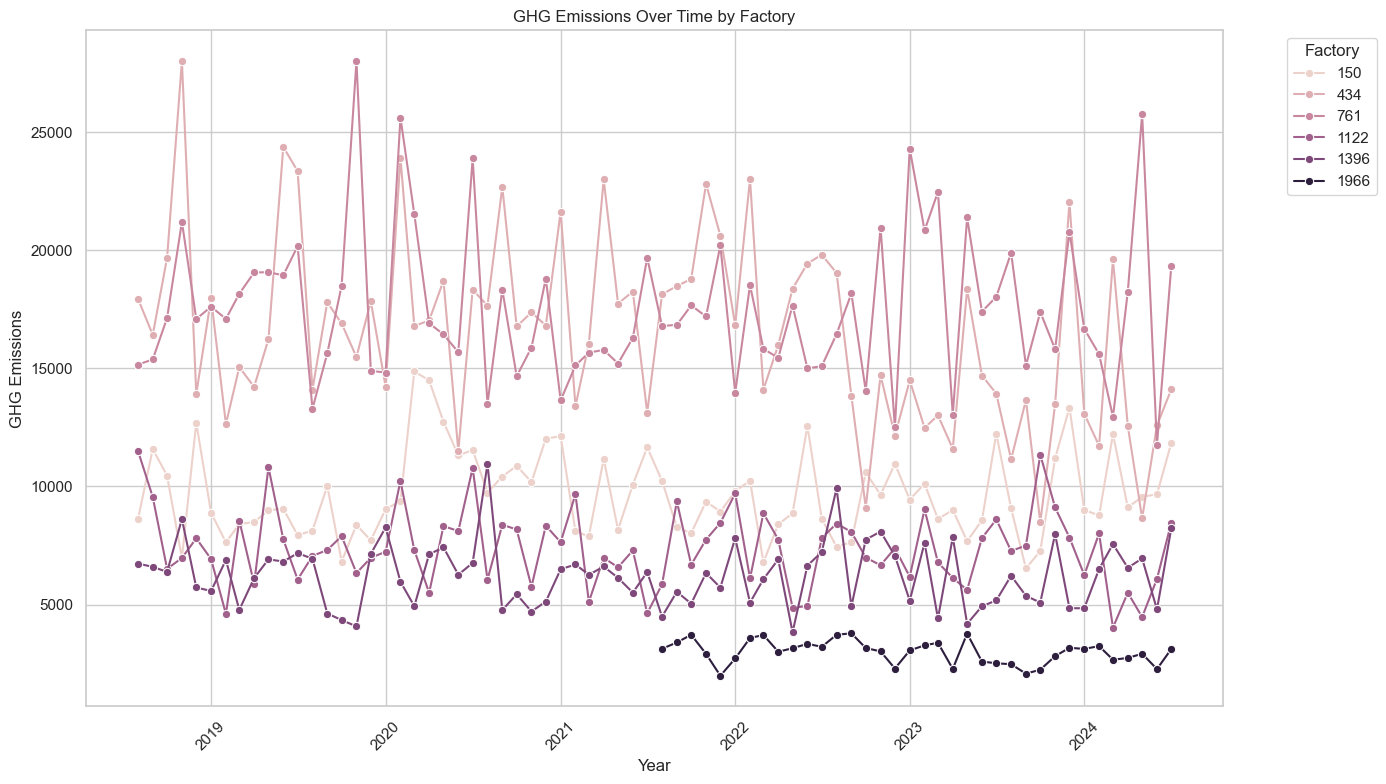

In [14]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(14, 8))

# Create a line plot with seaborn
sns.lineplot(
    data=data,           # Data source
    x='Month',           # X-axis variable
    y='GHG',             # Y-axis variable
    hue='Factory',       # Color lines by 'Factory' to differentiate them
    marker='o'           # Marker style for data points
)

# Set the title of the plot
plt.title('GHG Emissions Over Time by Factory')

# Label the x-axis
plt.xlabel('Year')    

# Label the y-axis
plt.ylabel('GHG Emissions')

# Customize the legend
plt.legend(
    title='Factory',         # Title for the legend
    bbox_to_anchor=(1.05, 1), # Position the legend outside the plot area
    loc='upper left'         # Location of the legend inside the plot
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()

**Factory 761** and **434** have the highest GHG emission. The noticeable thing is **Factory 761** has high efficiency, low standard allowed hours than **434**, still it has high green house gas emission which should be looked upon. 

**Factory 150** performs relatively well having highest efficiency and higher standard allowed hours but has moderate gas emissions. 

### GHG Emissions and Efficiency Trends by Factory

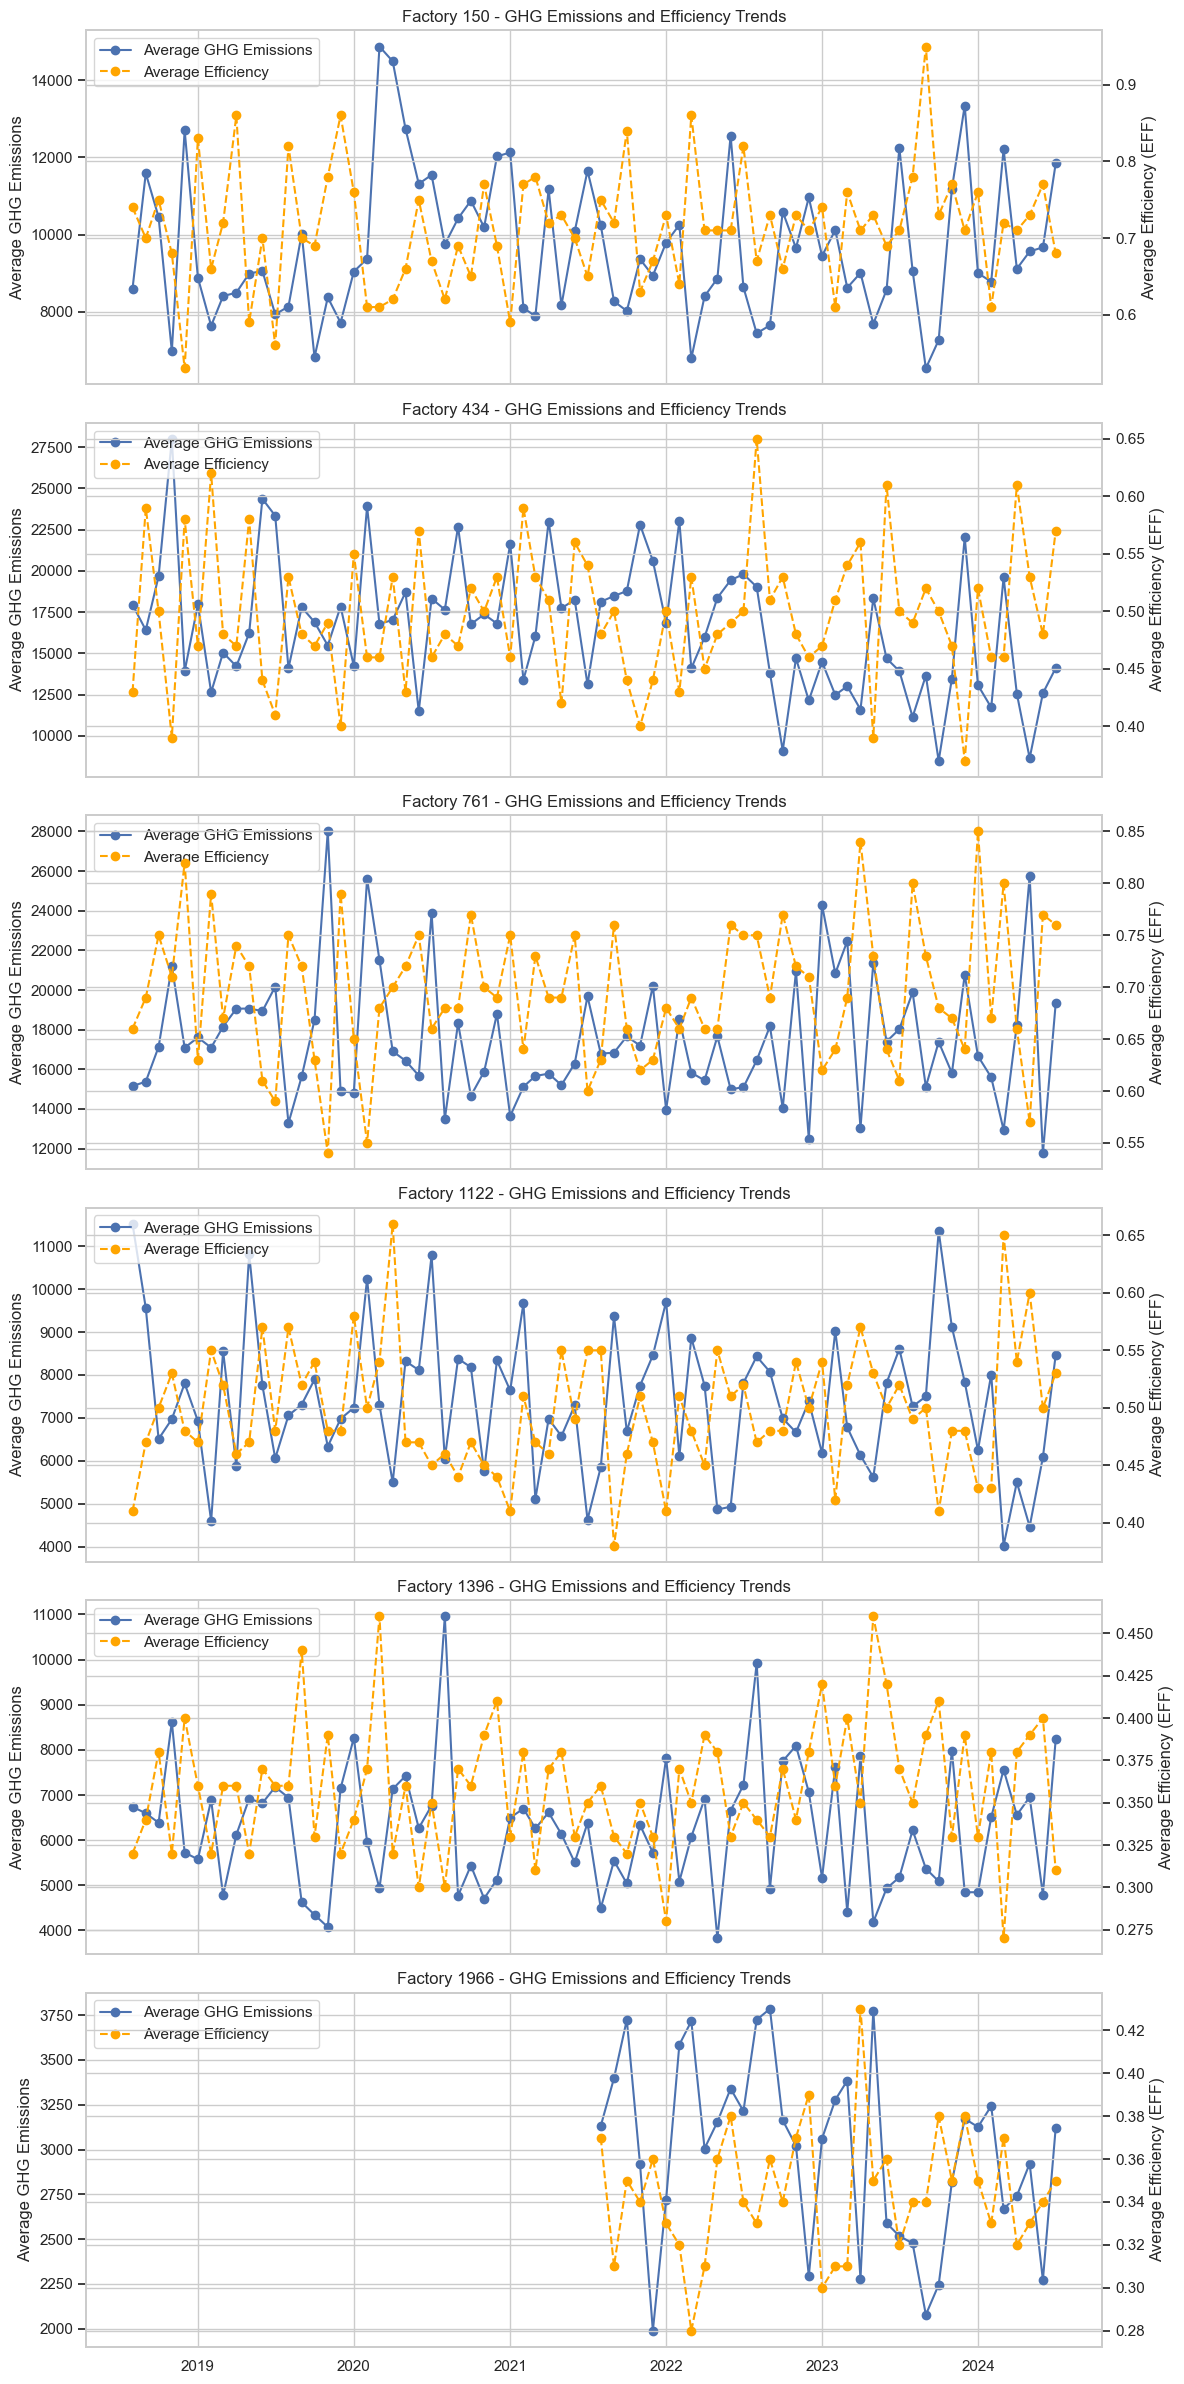

In [15]:
# Aggregate data to get the average GHG emissions and Efficiency (EFF) by Factory and Month
factory_ghg_trend = data.groupby(['Factory', 'Month'])['GHG'].mean().reset_index()
factory_efficiency_trend = data.groupby(['Factory', 'Month'])['EFF'].mean().reset_index()

# Get the list of unique factories
factories = data['Factory'].unique()

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=len(factories), ncols=1, figsize=(12, len(factories) * 4), sharex=True)

# Iterate over each factory to create subplots
for i, factory in enumerate(factories):
    # Filter data for the current factory
    ghg_data = factory_ghg_trend[factory_ghg_trend['Factory'] == factory]
    eff_data = factory_efficiency_trend[factory_efficiency_trend['Factory'] == factory]
    
    # Plot GHG emissions on the primary y-axis
    axes[i].plot(
        ghg_data['Month'], ghg_data['GHG'], 
        marker='o', linestyle='-', color='b', 
        label='Average GHG Emissions'
    )
    
    # Create a secondary y-axis for Efficiency
    ax2 = axes[i].twinx()
    ax2.plot(
        eff_data['Month'], eff_data['EFF'], 
        marker='o', linestyle='--', color='orange', 
        label='Average Efficiency'
    )
    
    # Set the title and labels for the current subplot
    axes[i].set_title(f'Factory {factory} - GHG Emissions and Efficiency Trends')
    axes[i].set_ylabel('Average GHG Emissions')  # Y-axis label for GHG emissions
    ax2.set_ylabel('Average Efficiency (EFF)')  # Y-axis label for Efficiency
    
    # Add grid lines to the primary y-axis for better readability
    axes[i].grid(True)
    
    # Combine legends from both y-axes and place them in the upper left
    lines, labels = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[i].legend(lines + lines2, labels + labels2, loc='upper left')

# Set the common x-axis label and rotate x-axis labels for better readability
plt.xlabel('Year') 
plt.xticks(rotation=45)

# Adjust layout to ensure all elements fit well within the figure area
plt.tight_layout()

# Display the plot
plt.show()

Efficiency shows a inverse relation with green house gas emissions. Increase in Efficiency leads to decrease in GHG Emission. This might be a key feature in reduction in GHG. 

### GHG Emissions and Standard Allowed Hours Trends by Factory

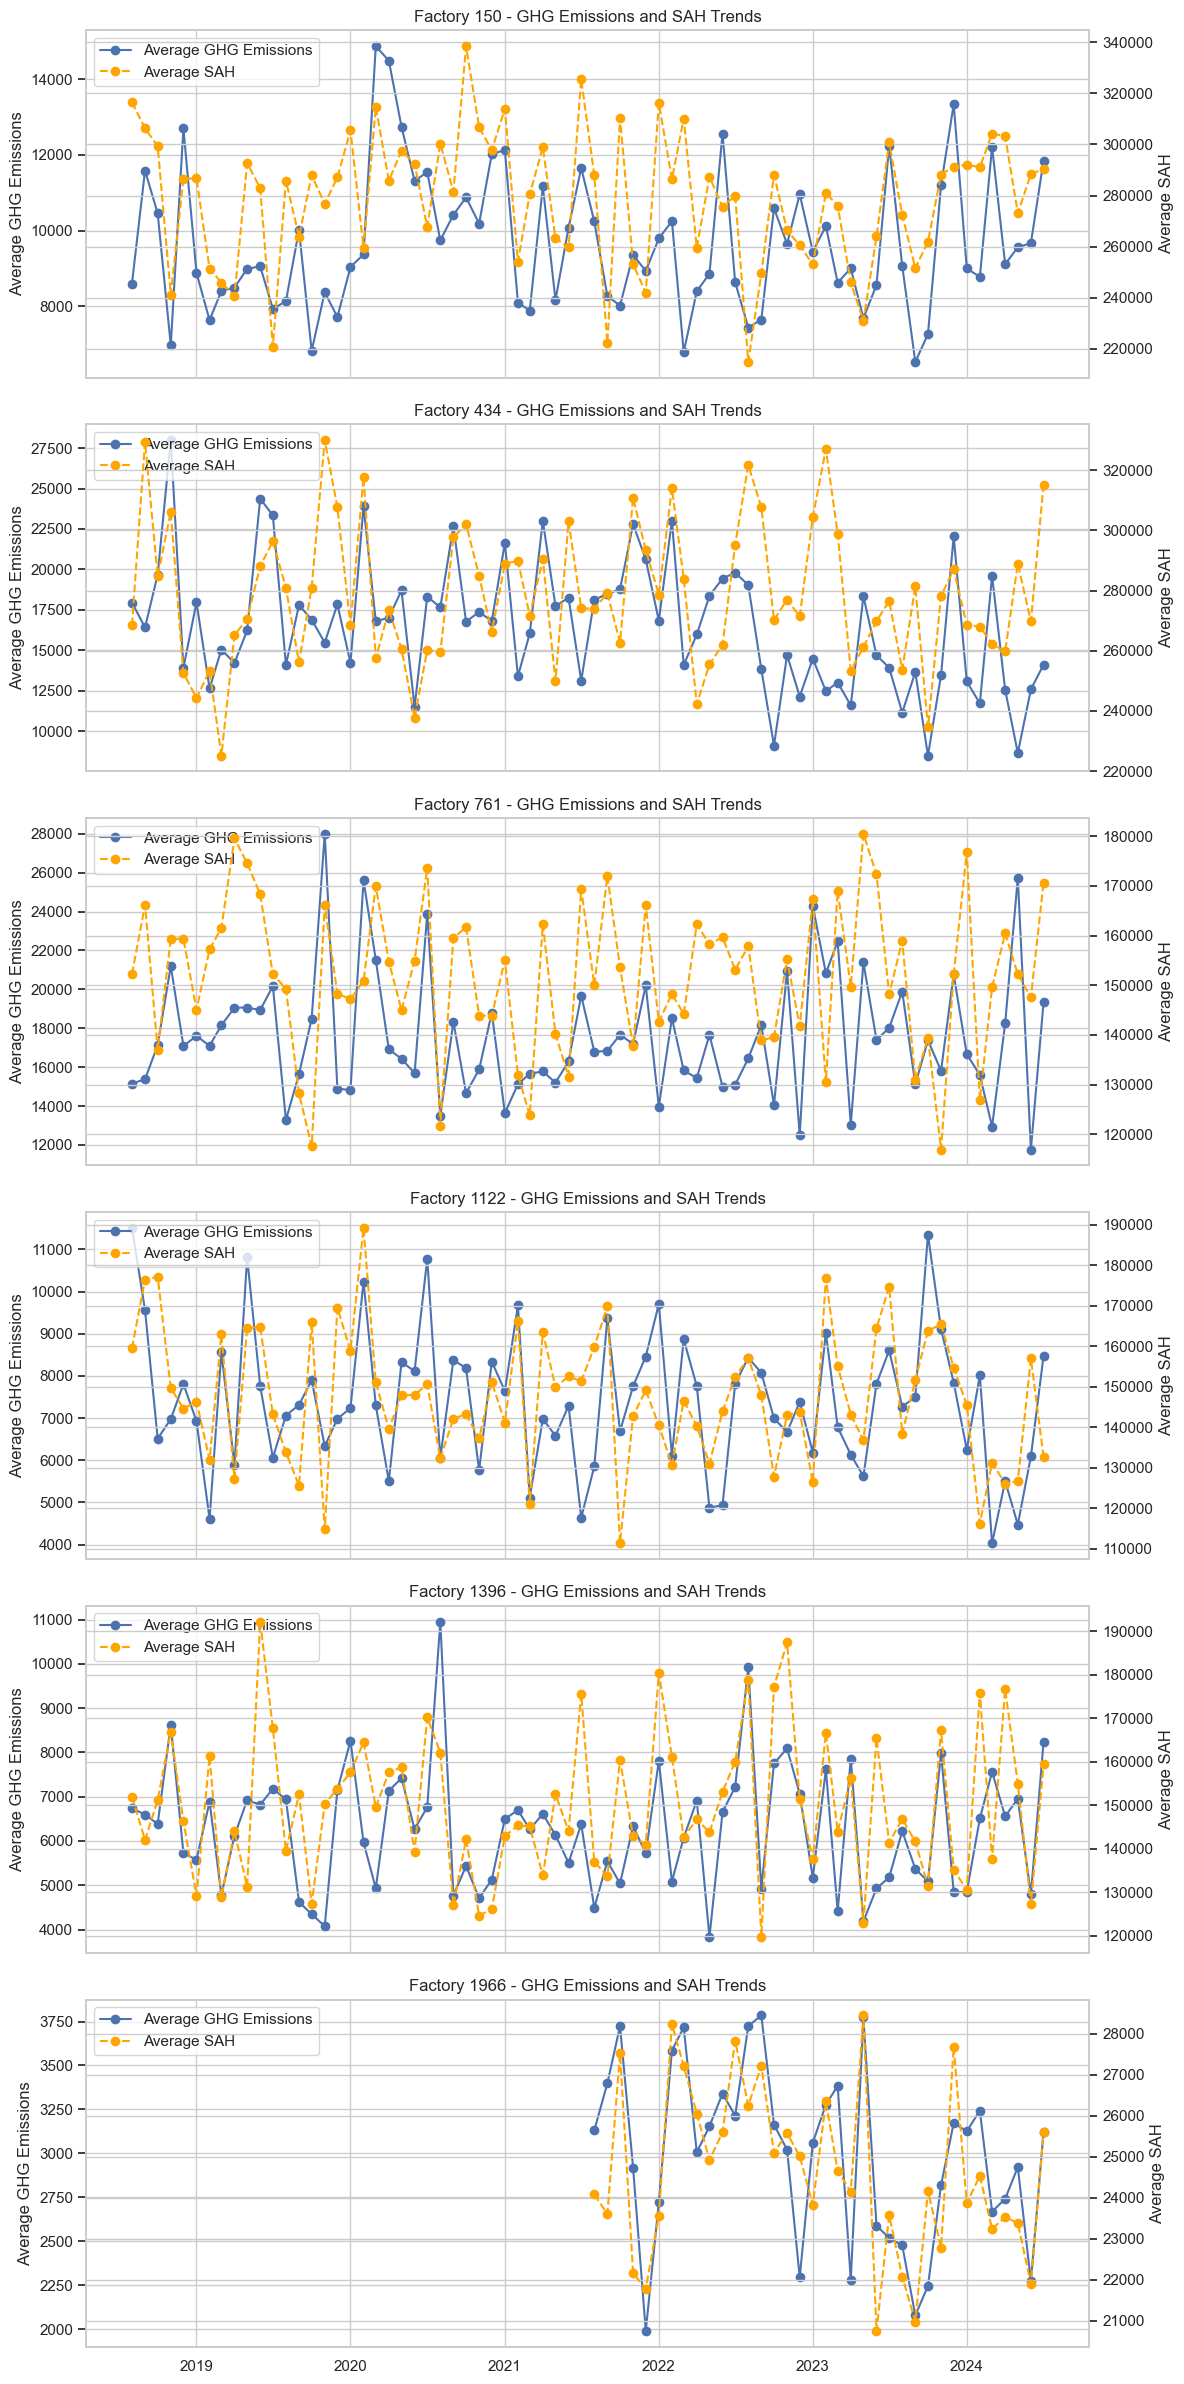

In [16]:
# Aggregate data to get the average GHG emissions and SAH by Factory and Month
factory_ghg_trend = data.groupby(['Factory', 'Month'])['GHG'].mean().reset_index()
factory_sah_trend = data.groupby(['Factory', 'Month'])['SAH'].mean().reset_index()  # Replace 'SAH' with the correct column name if needed

# Get the list of unique factories
factories = data['Factory'].unique()

# Create a figure and axes for subplots, one subplot per factory
fig, axes = plt.subplots(nrows=len(factories), ncols=1, figsize=(12, len(factories) * 4), sharex=True)

# Iterate over each factory to create individual subplots
for i, factory in enumerate(factories):
    # Filter data for the current factory
    ghg_data = factory_ghg_trend[factory_ghg_trend['Factory'] == factory]
    sah_data = factory_sah_trend[factory_sah_trend['Factory'] == factory]
    
    # Plot GHG emissions on the primary y-axis
    axes[i].plot(
        ghg_data['Month'], ghg_data['GHG'], 
        marker='o', linestyle='-', color='b', 
        label='Average GHG Emissions'
    )
    
    # Create a secondary y-axis for SAH
    ax2 = axes[i].twinx()
    ax2.plot(
        sah_data['Month'], sah_data['SAH'], 
        marker='o', linestyle='--', color='orange', 
        label='Average SAH'
    )
    
    # Set the title and labels for the current subplot
    axes[i].set_title(f'Factory {factory} - GHG Emissions and SAH Trends')
    axes[i].set_ylabel('Average GHG Emissions')  # Y-axis label for GHG emissions
    ax2.set_ylabel('Average SAH')  # Y-axis label for SAH

    # Add grid lines to the primary y-axis for better readability
    axes[i].grid(True)
    
    # Combine legends from both y-axes and place them in the upper left
    lines, labels = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[i].legend(lines + lines2, labels + labels2, loc='upper left')

# Set the common x-axis label and rotate x-axis labels for better readability
plt.xlabel('Year') 
plt.xticks(rotation=45)

# Adjust layout to ensure all elements fit well within the figure area
plt.tight_layout()

# Display the plot
plt.show()


Increasing Standard Allowed hours increase Green House Gas Emissions which is not desirable. 

### GHG Emissions and Worker Trends by Factory

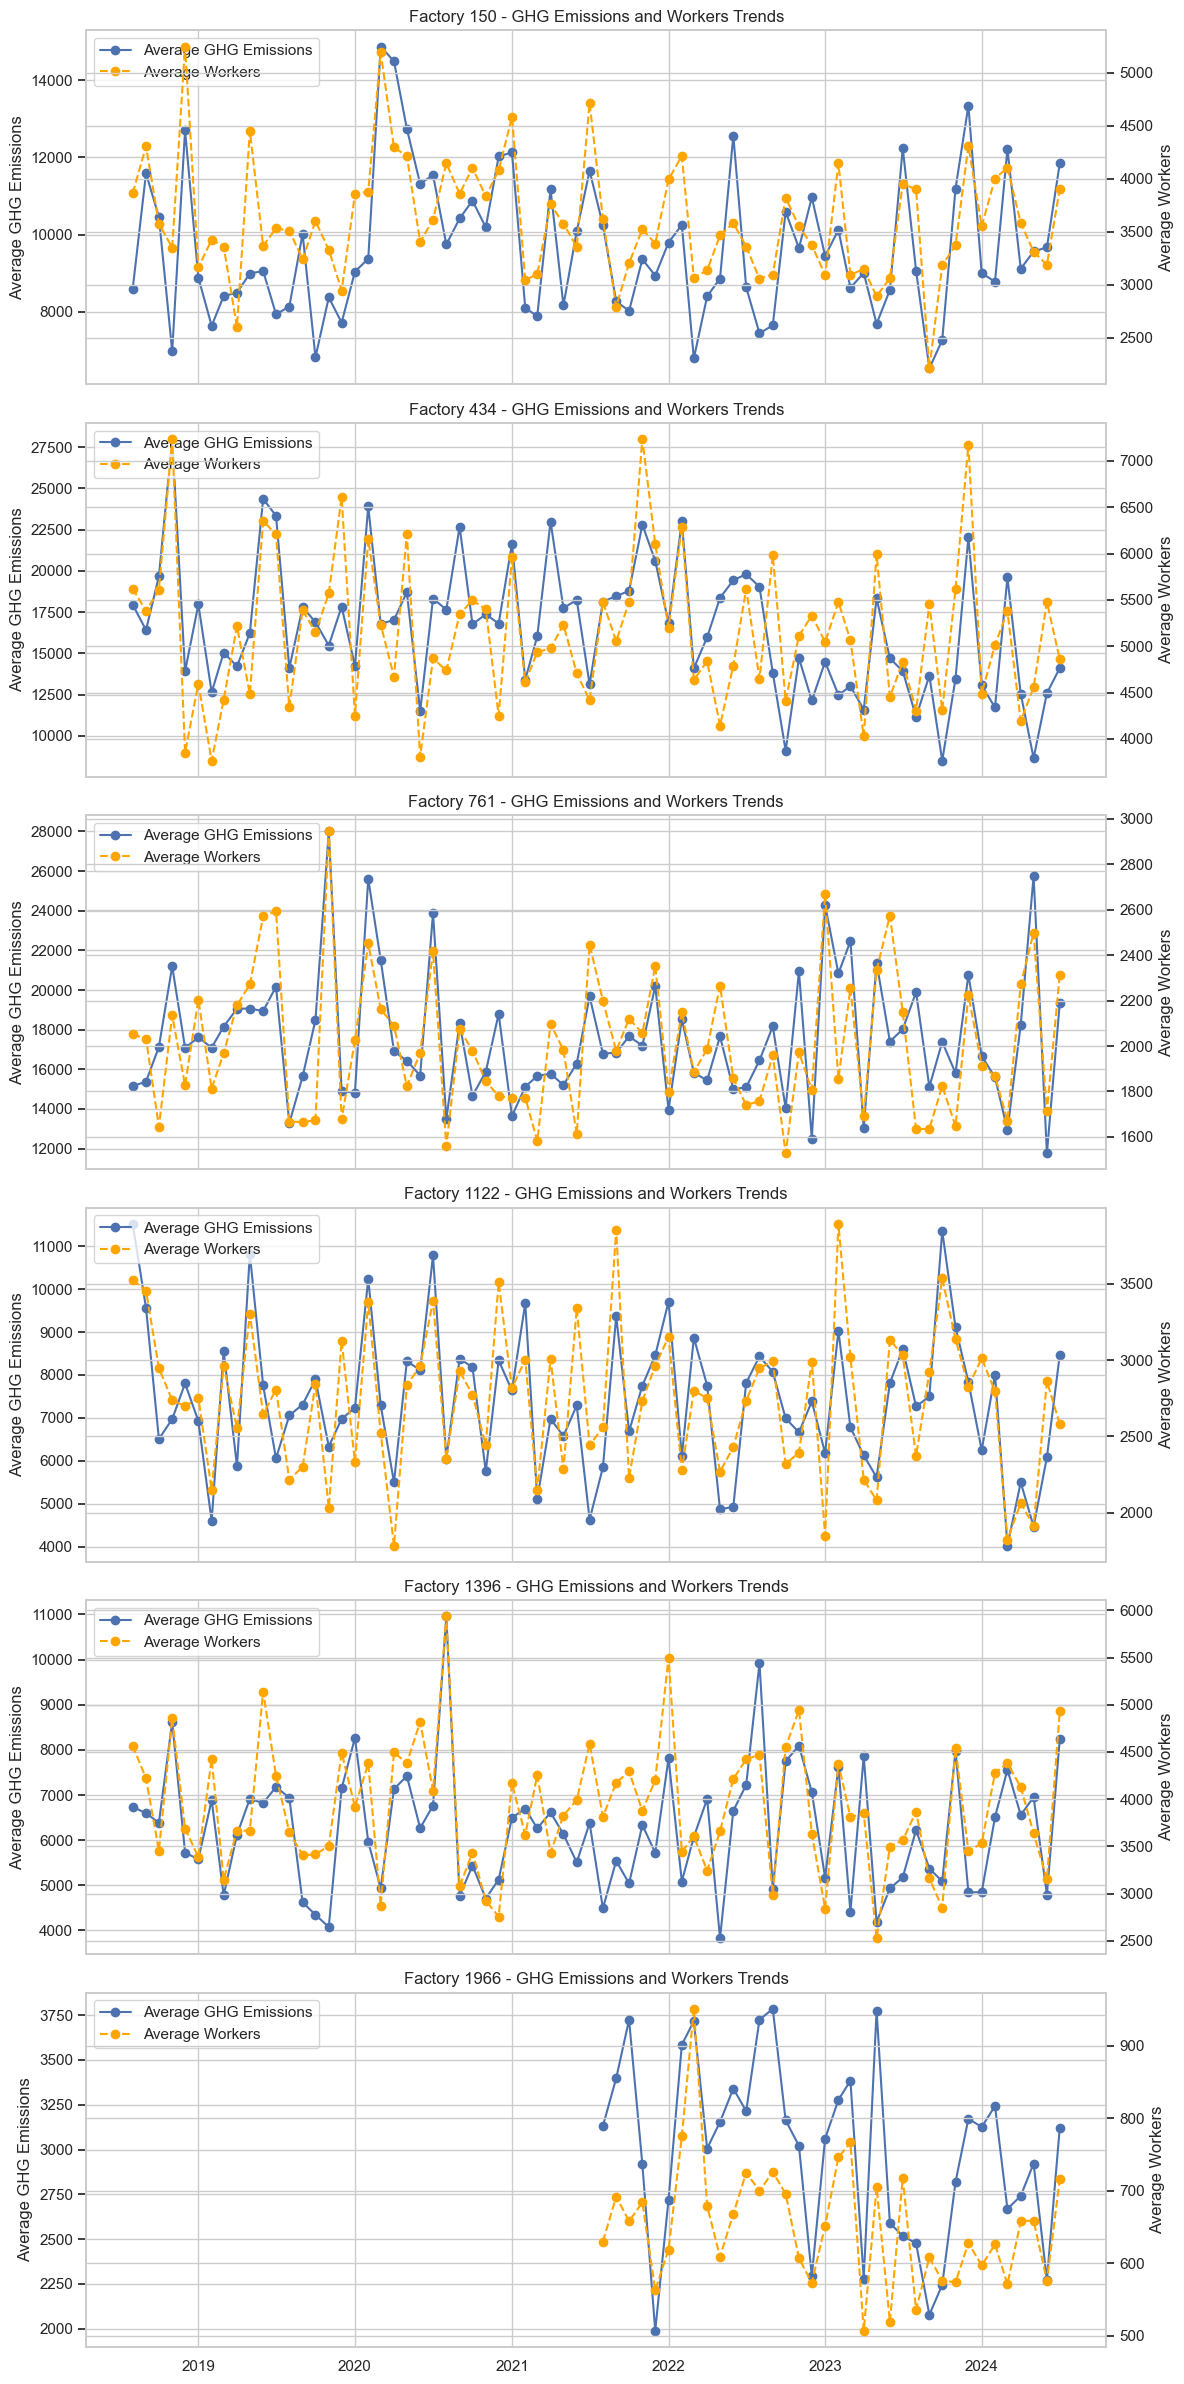

In [17]:
# Aggregate data to get the average GHG emissions and Workers (W) by Factory and Month
factory_ghg_trend = data.groupby(['Factory', 'Month'])['GHG'].mean().reset_index()
factory_w_trend = data.groupby(['Factory', 'Month'])['W'].mean().reset_index()

# Get the list of unique factories from the data
factories = data['Factory'].unique()

# Create a figure and axes for subplots, one subplot per factory
fig, axes = plt.subplots(nrows=len(factories), ncols=1, figsize=(12, len(factories) * 4), sharex=True)

# Iterate over each factory to create individual subplots
for i, factory in enumerate(factories):
    # Filter data specific to the current factory
    ghg_data = factory_ghg_trend[factory_ghg_trend['Factory'] == factory]
    w_data = factory_w_trend[factory_w_trend['Factory'] == factory]
    
    # Plot GHG emissions on the primary y-axis for the current factory
    axes[i].plot(
        ghg_data['Month'], ghg_data['GHG'], 
        marker='o', linestyle='-', color='b', 
        label='Average GHG Emissions'
    )
    
    # Create a secondary y-axis to plot Workers
    ax2 = axes[i].twinx()
    ax2.plot(
        w_data['Month'], w_data['W'], 
        marker='o', linestyle='--', color='orange', 
        label='Average Workers'
    )
    
    # Set the title and labels for the current subplot
    axes[i].set_title(f'Factory {factory} - GHG Emissions and Workers Trends')
    axes[i].set_ylabel('Average GHG Emissions')  # Label for the primary y-axis
    ax2.set_ylabel('Average Workers')  # Label for the secondary y-axis

    # Add grid lines to the primary y-axis for better readability
    axes[i].grid(True)
    
    # Combine legends from both y-axes and place them in the upper left
    lines, labels = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[i].legend(lines + lines2, labels + labels2, loc='upper left')

# Set the common x-axis label and rotate x-axis labels for better readability
plt.xlabel('Year')
plt.xticks(rotation=45)

# Adjust layout to ensure all elements fit well within the figure area
plt.tight_layout()

# Display the plot
plt.show()


No.of Workers shows a direct relation with greenhouse gas emissions  across different factories. Increases the no.of Worker leads to increase in GHG Emissions. 

### Standard Allowed Hours and Workers Trends by Factory

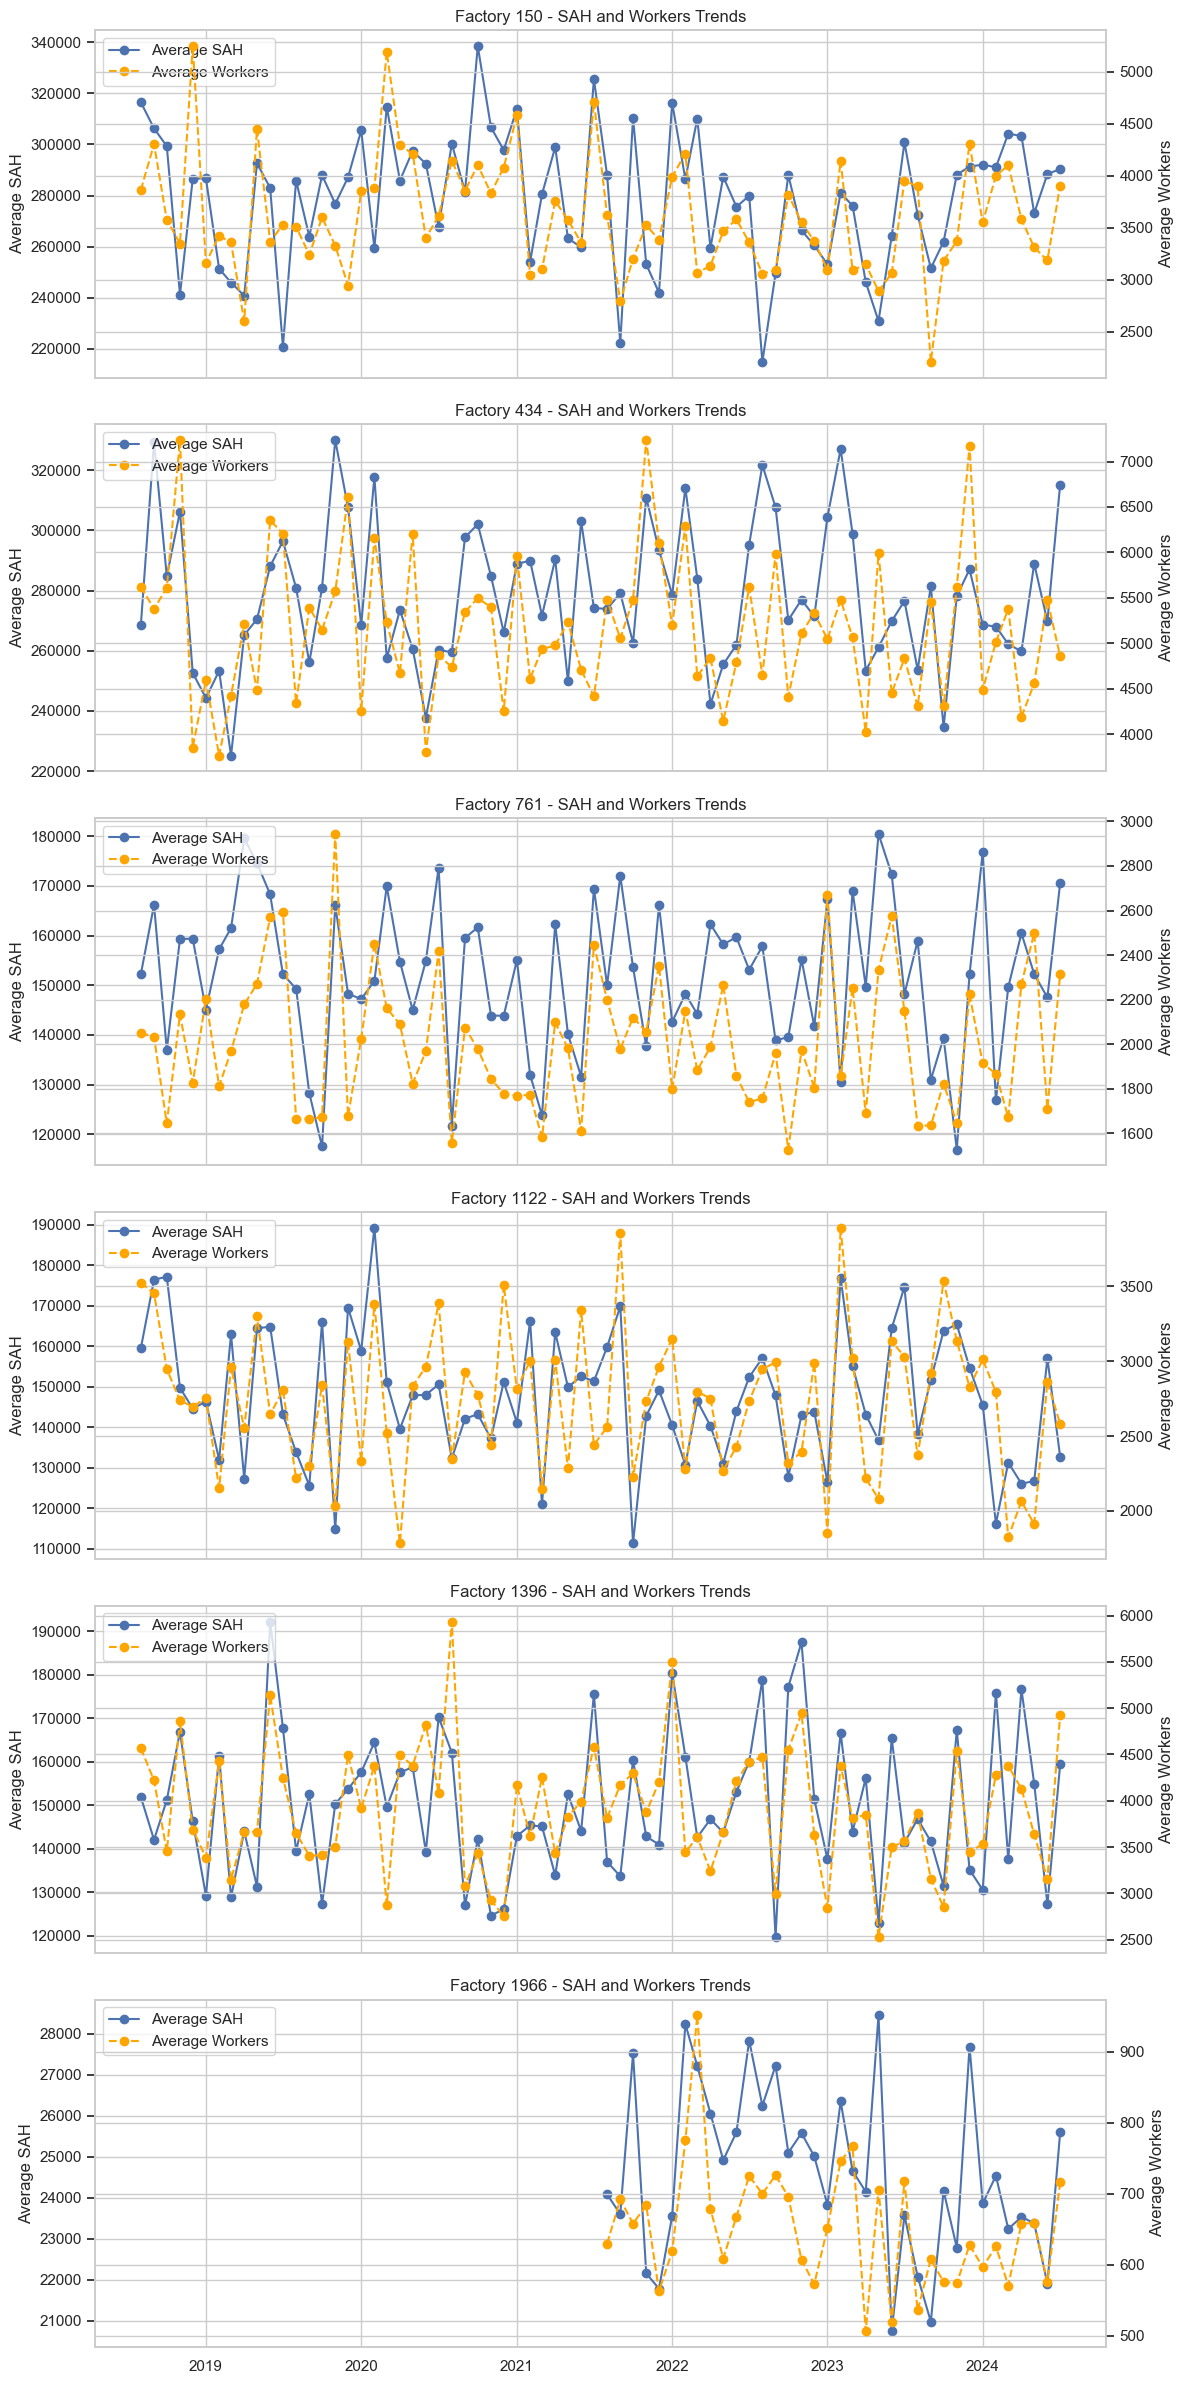

In [18]:
# Aggregate data to get the average SAH and Workers (W) by Factory and Month
factory_sah_trend = data.groupby(['Factory', 'Month'])['SAH'].mean().reset_index() 
factory_w_trend = data.groupby(['Factory', 'Month'])['W'].mean().reset_index()

# Get a list of unique factories
factories = data['Factory'].unique()

# Create a figure and a set of subplots, one for each factory
fig, axes = plt.subplots(nrows=len(factories), ncols=1, figsize=(12, len(factories) * 4), sharex=True)

# Loop through each factory to create individual subplots
for i, factory in enumerate(factories):
    # Filter the aggregated data for the current factory
    sah_data = factory_sah_trend[factory_sah_trend['Factory'] == factory]
    w_data = factory_w_trend[factory_w_trend['Factory'] == factory]
    
    # Plot SAH on the primary y-axis for the current factory
    axes[i].plot(
        sah_data['Month'], sah_data['SAH'], 
        marker='o', linestyle='-', color='b', 
        label='Average SAH'
    )
    
    # Create a secondary y-axis to plot Workers (W)
    ax2 = axes[i].twinx()
    ax2.plot(
        w_data['Month'], w_data['W'], 
        marker='o', linestyle='--', color='orange', 
        label='Average Workers'
    )
    
    # Set title and labels for the current subplot
    axes[i].set_title(f'Factory {factory} - SAH and Workers Trends')
    axes[i].set_ylabel('Average SAH')  # Label for the primary y-axis
    ax2.set_ylabel('Average Workers')  # Label for the secondary y-axis
    
    # Add grid lines to the primary y-axis for better readability
    axes[i].grid(True)
    
    # Combine legends from both y-axes and place them in the upper left
    lines, labels = axes[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    axes[i].legend(lines + lines2, labels + labels2, loc='upper left')

# Set the common x-axis label and rotate x-axis labels for better readability
plt.xlabel('Year') 
plt.xticks(rotation=45)

# Adjust layout to make sure all elements fit well within the figure area
plt.tight_layout()

# Display the plot
plt.show()

Workers and standard allowed hours shows a direct relation across the factories over time. Whereever the no.f workers are increased, standard allowed hours also increases

### Correlation Matrix

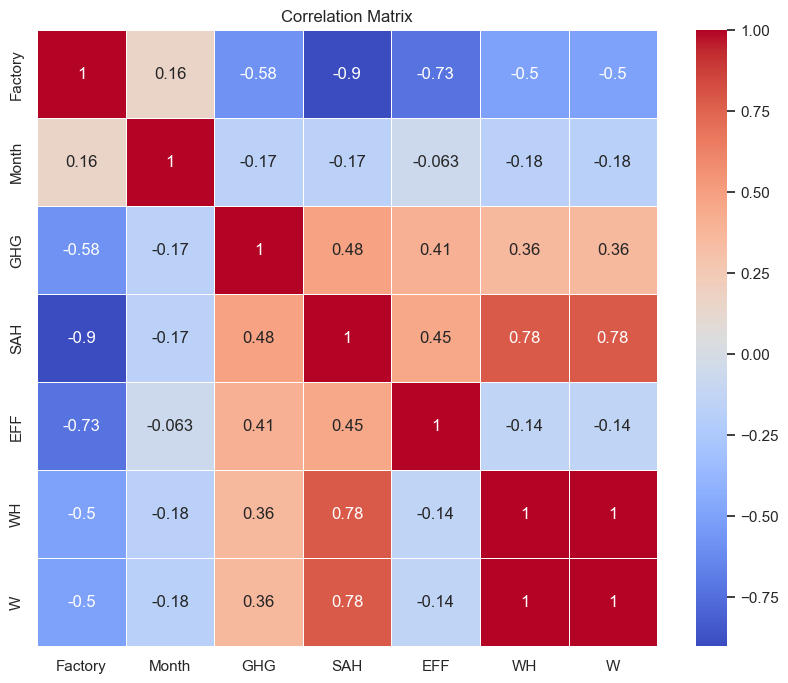

In [19]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**GHG and SAH (0.48):** Moderate positive correlation, indicating that higher standard allowed hours (more production) is associated with higher GHG emissions.

**GHG and EFF (0.41):** Moderate positive correlation, suggesting that lower efficiency might lead to higher GHG emissions. Improving efficiency could help reduce emissions.

**GHG and WH (0.36) & W (0.36):** Both total working hours and the number of workers show a weak positive correlation with GHG emissions. These factors have less impact on GHG emissions compared to production metrics like SAH.

**SAH, WH, and W:** Strong correlations between SAH, WH, and the number of workers, indicating that these factors scale together with production.

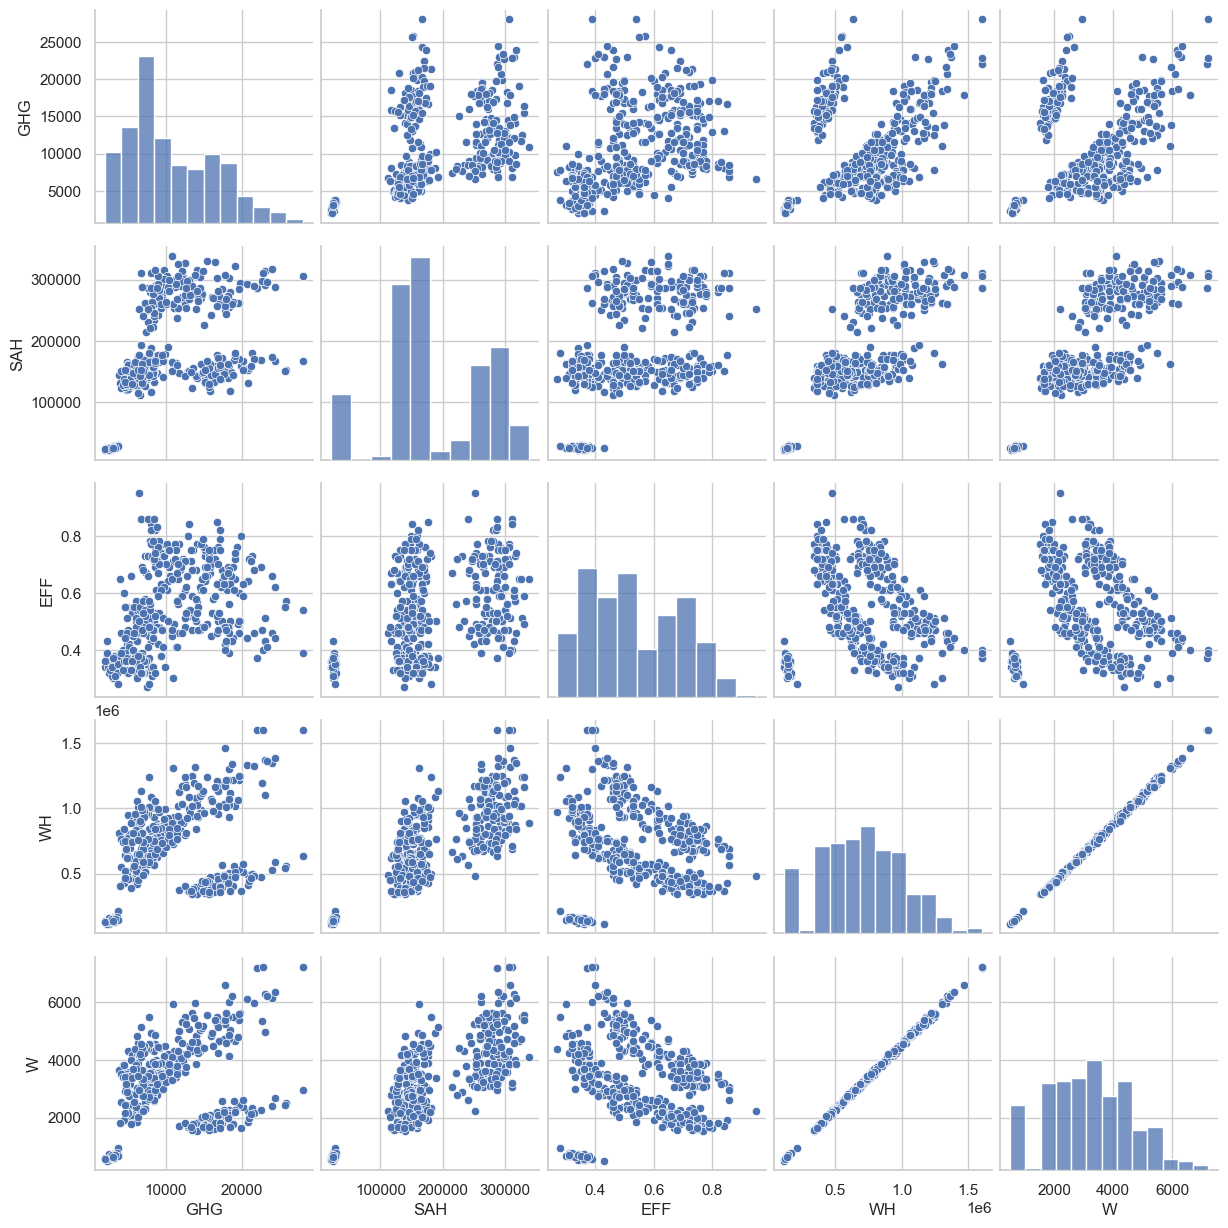

In [20]:
# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Create a pairplot to visualize pairwise relationships among the selected variables
sns.pairplot(data[['GHG', 'SAH', 'EFF', 'WH', 'W']])

# Show the plot
plt.show()

The pairplot analysis indicates that the correlation between GHG and other features is non-linear. Therefore, we will employ non-linear models for training our data.

# Splitting The Data 

In [21]:
# Separating features (X) and target variable (y)
X = data.drop(columns=['Factory', 'Month', 'GHG'])
y = data['GHG']

# Model Training

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

def train(model, X, y):
    """
    Trains a machine learning model, evaluates its performance, and computes cross-validation score.

    Parameters:
    model : object
        The machine learning model to be trained.
    X : DataFrame
        The features of the dataset.
    y : Series
        The target variable of the dataset.
    """
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    
    # Fitting the model on the training data
    model.fit(x_train, y_train)
    
    # Predicting the target variable using the trained model
    pred = model.predict(x_test)
    
    # Computing mean squared error (MSE) and r2 on the test data
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    # Performing cross-validation to estimate model performance
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    # Printing the results
    print("Results")
    print("MSE:", mse)
    print("R2 Score:", r2)
    print("CV Score:", cv_score)

## Linear Regression

Results
MSE: 21201740.849747796
R2 Score: 0.3232647798280791
CV Score: 19706809.83147032


<Axes: title={'center': 'Model Coefficients'}>

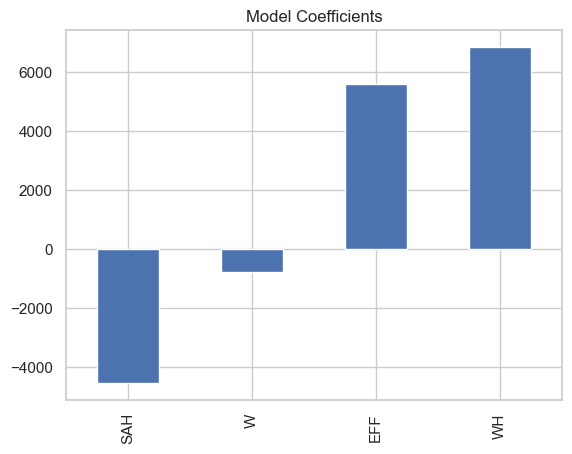

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Creating a pipeline with feature scaling and linear regression
model = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('linear_regression', LinearRegression())  # Linear regression model
])

# Training the model and evaluating its performance
train(model, X, y)

# Extracting coefficients of the trained model and sorting them
coef = pd.Series(model.named_steps['linear_regression'].coef_, X.columns).sort_values()

# Visualizing the model coefficients as a bar plot
coef.plot(kind='bar', title='Model Coefficients')

## Decision Tree Regressor

Results
MSE: 20839282.808385417
R2 Score: 0.3348340242671446
CV Score: 18605663.65000095


<Axes: title={'center': 'Feature Importance'}>

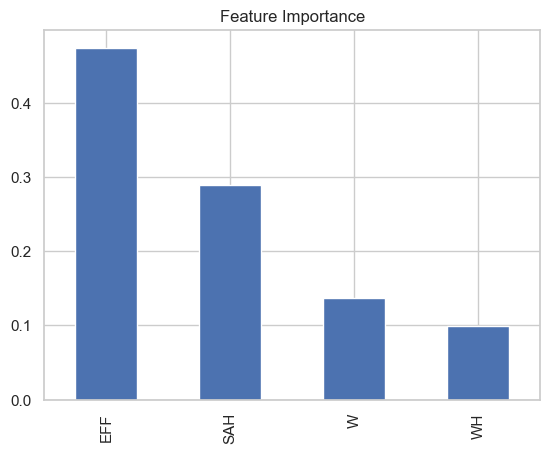

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Creating a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')

## Random Forest Regressor

Results
MSE: 7988964.314614404
R2 Score: 0.7450014334808497
CV Score: 10374983.022341017


<Axes: title={'center': 'Feature Importance'}>

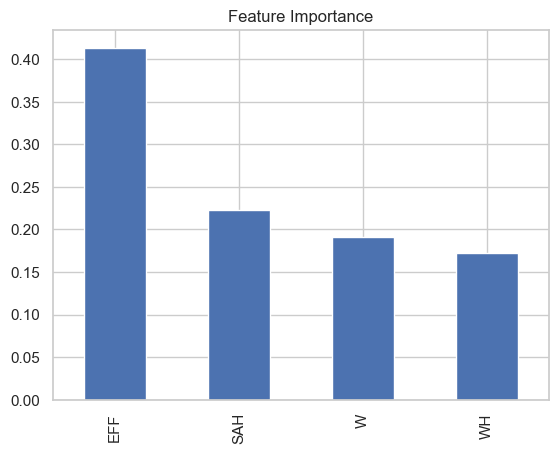

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Creating a Random Forest Regressor model
model = RandomForestRegressor(n_jobs=-1)

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')

## Extra Trees Regressor

Results
MSE: 7354978.583822767
R2 Score: 0.7652375299482885
CV Score: 9832495.115739357


<Axes: title={'center': 'Feature Importance'}>

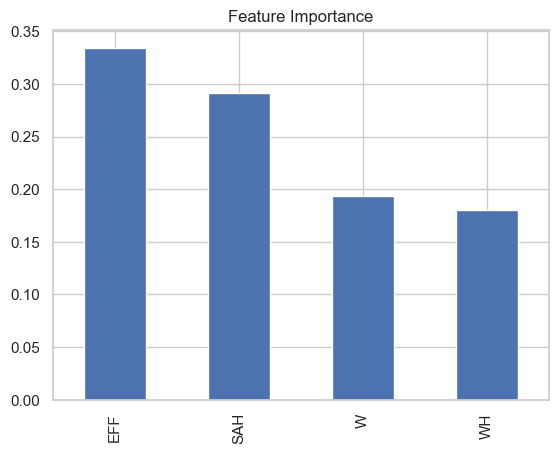

In [26]:
from sklearn.ensemble import ExtraTreesRegressor

# Creating an Extra Trees Regressor model
model = ExtraTreesRegressor(n_jobs=-1)

# Training the model and evaluating its performance
train(model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')

## XG Boost

Results
MSE: 7537813.177330902
R2 Score: 0.7594016596879348
CV Score: 12825296.394994922


<Axes: title={'center': 'Feature Importance'}>

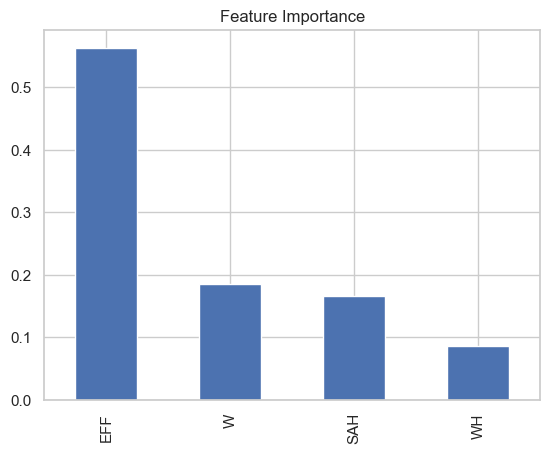

In [27]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
model = xgb.XGBRegressor()

# Train the model and evaluate its performance
train(model, X, y)

# Get the feature importances and sort them
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)

# Plot the feature importances
coef.plot(kind='bar', title='Feature Importance')


### Key Findings:

ExtraTress Regressor models performs relatively well as compared to other models with: 

* MSE: 7430812.396564298* 
R2 Score: 0.762817001731959
* 
CV Score: 10076910.1150736

We will further hypertune the model for best performance

# Hyperparameter Tuning of Extra Trees Regressor

Hyperparameter tuning is a crucial step in the machine learning pipeline that helps extract the full potential of models and ensures that they achieve the best possible performance on the task at hand.

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}
Best CV Score: 2875.582311371758
Results
MSE: 6421151.622554805
R2 Score: 0.7950442141594894
CV Score: 8268973.629474143


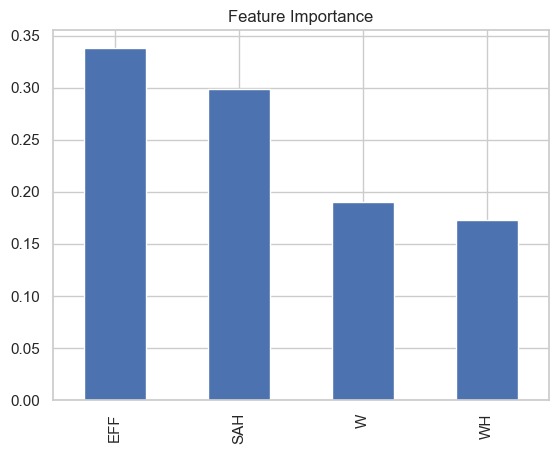

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Instantiate the Extra Trees Regressor
model = ExtraTreesRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best CV Score:", best_score)

# Training the model with the best parameters
best_model = grid_search.best_estimator_
train(best_model, X, y)

# Extracting feature importances from the trained model and sorting them
features = pd.Series(best_model.feature_importances_, X.columns).sort_values(ascending=False)

# Visualizing feature importances as a bar plot
features.plot(kind='bar', title='Feature Importance')
plt.show()


After hypertuning we get the R2 value of approx 0.795 means that approximately 79.5% of the variance in the target variable is explained by your model and low MSE and CV score value. 

It gives the Efficiency feature of high importance. 

### Interpreting the GHG Emissions After Increasing Efficiency by 10% 

Actual GHG Reduction Achieved: -8.70%
   Original_GHG  Adjusted_GHG
0       11843.4  12152.763949
1       14111.3  14542.697397
2       19339.7   7955.430032
3        8470.5   5770.668198
4        8236.1   7943.176111


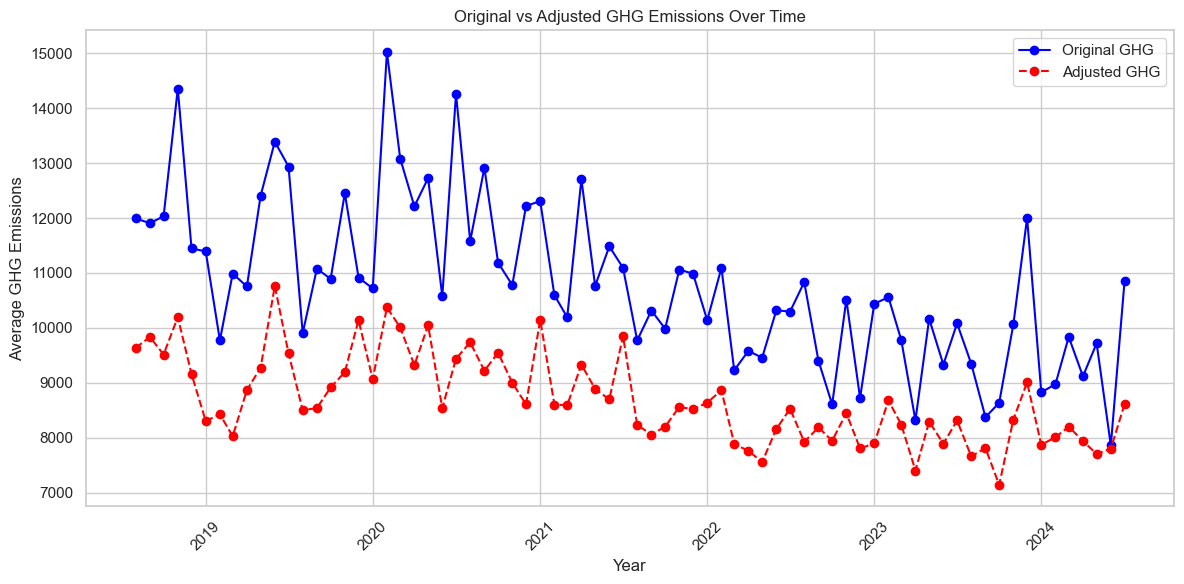

In [29]:
# Original GHG data
original_ghg = y

#Increasing efficiency by 10% 
X_adjusted = X.copy()
X_adjusted['EFF'] = X['EFF'] * 0.10

# Ensuring no efficiency exceeds 1 (100%)
X_adjusted['EFF'] = np.clip(X_adjusted['EFF'], None, 1)

# Predicting GHG with the adjusted efficiency values
predicted_ghg = best_model.predict(X_adjusted)

# Checking if the GHG has reduced by increasing efficiency by 10%
actual_reduction = ((predicted_ghg - original_ghg) / original_ghg).mean()
print(f"Actual GHG Reduction Achieved: {actual_reduction * 100:.2f}%")

# Compare the original and adjusted GHG values
comparison_df = pd.DataFrame({
    'Original_GHG': original_ghg,
    'Adjusted_GHG': predicted_ghg
})

print(comparison_df.head())

comparison_df['Month'] = data['Month']

# Aggregate the data by month for clearer visualization
monthly_comparison = comparison_df.groupby('Month').mean().reset_index()

# Plotting the original vs adjusted GHG emissions over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_comparison['Month'], monthly_comparison['Original_GHG'], marker='o', linestyle='-', color='blue', label='Original GHG')
plt.plot(monthly_comparison['Month'], monthly_comparison['Adjusted_GHG'], marker='o', linestyle='--', color='red', label='Adjusted GHG')
plt.title("Original vs Adjusted GHG Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Average GHG Emissions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Here we can see 8.7% reduction in GHG emission by increasing 10& efficiency

# Recommendations:

Based on the analysis, provide specific measures to reduce GHG emissions:

**1. Improve Efficiency (EFF):**
* Identify best practices from the most efficient factories and standardize them across all factories.
* Provide additional training to workers to improve their skills and reduce production time.

**2. Optimize Working Hours (WH) and Number of Workers (W):**
* Streamline processes to ensure optimal use of working hours and workforce.
* Implement energy-saving measures during non-production hours.
    
**3. Monitor and Control SAH:**
* Regularly review and adjust standard allowed hours to ensure they reflect realistic production conditions.
